## Describa el conjunto de datos:

*  Número de instancias:
*  Número de atributos:
*  ¿El conjunto de datos está etiquetado? ¿Cuántas clases tiene el conjunto de datos?
*  ¿Cuántos atributos son numéricos y cuántos categóricos?
*  Reporte la moda para cada atributo categórico.
*  Reporte la media, rango y desviación estándar para cada atributo numérico.
*  Determine el número de valores faltantes para cada atributo.
*  Determine la distribución de las clases.


Hay 308 instancias.
-------------------
Hay 15 atributos.
-------------------
G : numérico
	Media: 342.90584415584414
	Rango: 2 - 1315
	Desviación Estandar: 285.66062795409647
	N° de valores nulos: 0
-------------------
GS : numérico
	Media: 194.49675324675326
	Rango: 0 - 1302
	Desviación Estandar: 246.88741843917657
	N° de valores nulos: 0
-------------------
MPG : numérico
	Media: 21.94155844155843
	Rango: 4.5 - 37.7
	Desviación Estandar: 8.150383786640825
	N° de valores nulos: 0
-------------------
FG% : numérico
	Media: 0.44993181818181793
	Rango: 0.267 - 0.644
	Desviación Estandar: 0.058373546287078554
	N° de valores nulos: 0
-------------------
3p% : numérico
	Media: 0.24623701298701314
	Rango: 0.0 - 1.0
	Desviación Estandar: 0.15653320404181295
	N° de valores nulos: 0
-------------------
FT% : numérico
	Media: 0.7288538961038961
	Rango: 0.0 - 1.0
	Desviación Estandar: 0.13033640294504703
	N° de valores nulos: 0
-------------------
OFF : numérico
	Media: 1.0159090909090909
	Rango

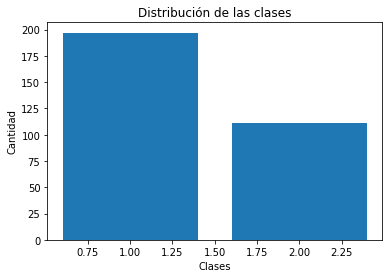

In [42]:
import numpy as np
import pandas as pd
from sklearn import model_selection, tree, preprocessing, metrics
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


categoricos_count = 0
numericos_count = 0
data_frame = pd.read_csv("nba.txt", sep=" ", comment="#")
column_names = data_frame.columns
x = data_frame[column_names[0:-1]]
y = data_frame[column_names[-1]]

n_instancias = x.shape[0]
print("Hay {} instancias.".format(n_instancias))
print("-------------------")
print("Hay {} atributos.".format(x.shape[1]))
print("-------------------")

for col_name in x:
  column = x[col_name]
  if str(column.dtype) == "object":
    print(col_name, ": categórico")
    print("\tModa:", column.mode().values[0])
    categoricos_count += 1
    # Conversión de categoricos a númericos
    le = preprocessing.LabelEncoder()
    x[col_name] = le.fit_transform(column)
    # Fin conversión
  else:
    print(col_name, ": numérico")
    print("\tMedia:", column.mean())
    print("\tRango:", column.min(), "-",  column.max())
    print("\tDesviación Estandar:", column.std())
    numericos_count += 1
  print("\tN° de valores nulos:", (n_instancias-column.count()))  
  print("-------------------")

print("Hay {} atributos numéricos y {} categóricos.".format(numericos_count, categoricos_count))
print("-------------------")
clases = list(set(y))
clases_to_print = str(clases).replace("'","").replace("[","").replace("]","")
print("Hay {} clases y son: {}".format(len(clases), clases_to_print))
print("-------------------")
y_copy = y.to_list()
cantidad = []
for clase in clases:
  cantidad.append(y_copy.count(clase))
plt.bar(clases, cantidad)
plt.ylabel("Cantidad")
plt.xlabel("Clases")
plt.title("Distribución de las clases")
plt.show()

## Haga una partición del conjunto de datos, usando muestreo estratificado, en 70% para entrenamiento y 30%.

In [0]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7, test_size=0.3)

## Entrene el modelo Decision Tree.

In [44]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Mida el desempeño del calculando exactitud (Accuracy), error de clasificación, precisión (Precision), índice de recuperación (Recall) y área bajo la curva ROC.

In [45]:
y_pred = d_tree.predict(x_test)
print("Exactitud(Accuracy):", metrics.accuracy_score(y_test, y_pred))
print("Error de clasificación:", d_tree.score(x_test, y_test))
print("Precisión(Precision):", metrics.precision_score(y_test, y_pred, average="macro"))
print("Índice de recuperación (Recall):", metrics.recall_score(y_test, y_pred, average="macro"))

Exactitud(Accuracy): 0.946236559139785
Error de clasificación: 0.946236559139785
Precisión(Precision): 0.9455665024630542
Índice de recuperación (Recall): 0.9407894736842105


## Modifique el modelo anterior para que también calcule el desempeño en el conjunto de entrenamiento.

In [46]:
y_pred = d_tree.predict(x_train)
print("Exactitud(Accuracy):", metrics.accuracy_score(y_train, y_pred))
print("Error de clasificación:", d_tree.score(x_train, y_train))
print("Precisión(Precision):", metrics.precision_score(y_train, y_pred, average="macro"))
print("Índice de recuperación (Recall):", metrics.recall_score(y_train, y_pred, average="macro"))

Exactitud(Accuracy): 1.0
Error de clasificación: 1.0
Precisión(Precision): 1.0
Índice de recuperación (Recall): 1.0


## Haga diferentes pruebas cambiando la profundidad máxima del árbol en el operador Decisión Tree. Pruebe los valores 1,2,...,10.

In [47]:
depth_values = []
error_test_values = []
error_train_values = []
for k in range(1,11):
  depth_values.append(k)
  print("Profundidad Máxima :", k)
  d_tree = tree.DecisionTreeClassifier(max_depth=k)
  d_tree.fit(x_train, y_train)
  y_pred = d_tree.predict(x_test)
  error_test = d_tree.score(x_test, y_test)
  error_test_values.append(error_test)
  print("\tMedidas Prueba:")
  print("\t\tExactitud(Accuracy):", metrics.accuracy_score(y_test, y_pred))
  print("\t\tError de clasificación:", error_test)
  print("\t\tPrecisión(Precision):", metrics.precision_score(y_test, y_pred, average="macro"))
  print("\t\tÍndice de recuperación (Recall):", metrics.recall_score(y_test, y_pred, average="macro"))
  print("\tMedidas Entrenamiento:")
  y_pred = d_tree.predict(x_train)
  error_train =  d_tree.score(x_train, y_train)
  error_train_values.append(error_train)
  print("\t\tExactitud(Accuracy):", metrics.accuracy_score(y_train, y_pred))
  print("\t\tError de clasificación:", error_train)
  print("\t\tPrecisión(Precision):", metrics.precision_score(y_train, y_pred, average="macro"))
  print("\t\tÍndice de recuperación (Recall):", metrics.recall_score(y_train, y_pred, average="macro"))

Profundidad Máxima : 1
	Medidas Prueba:
		Exactitud(Accuracy): 0.8602150537634409
		Error de clasificación: 0.8602150537634409
		Precisión(Precision): 0.8539408866995074
		Índice de recuperación (Recall): 0.8501461988304093
	Medidas Entrenamiento:
		Exactitud(Accuracy): 0.8930232558139535
		Error de clasificación: 0.8930232558139535
		Precisión(Precision): 0.8831224841863139
		Índice de recuperación (Recall): 0.8807142857142857
Profundidad Máxima : 2
	Medidas Prueba:
		Exactitud(Accuracy): 0.9139784946236559
		Error de clasificación: 0.9139784946236559
		Precisión(Precision): 0.9069377990430623
		Índice de recuperación (Recall): 0.9144736842105263
	Medidas Entrenamiento:
		Exactitud(Accuracy): 0.9534883720930233
		Error de clasificación: 0.9534883720930233
		Precisión(Precision): 0.9431545973834531
		Índice de recuperación (Recall): 0.9580952380952381
Profundidad Máxima : 3
	Medidas Prueba:
		Exactitud(Accuracy): 0.9139784946236559
		Error de clasificación: 0.9139784946236559
		Precisi

## Grafique la profundidad del árbol contra la evolución del error de entrenamiento y el error de prueba.

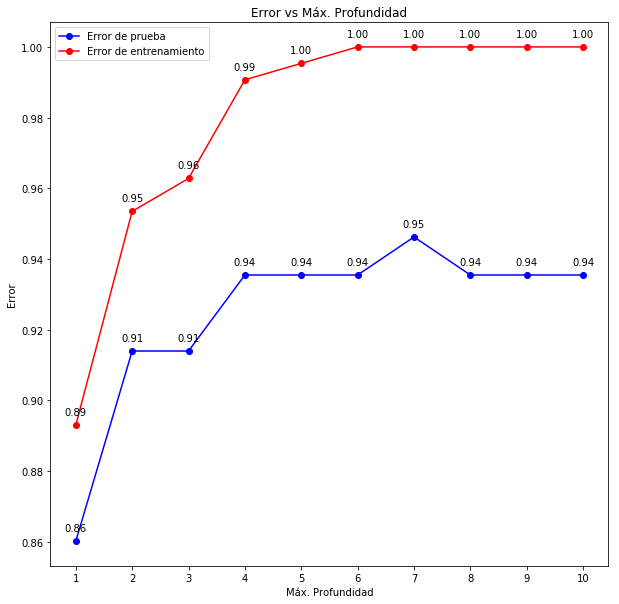

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(depth_values, error_test_values, 'bo-', label="Error de prueba", color="blue")
plt.plot(depth_values, error_train_values, 'bo-', label="Error de entrenamiento", color="red")
for d in depth_values:
    y1 = error_test_values[d-1]
    y2 = error_train_values[d-1]
    plt.annotate("{:.2f}".format(y1), (d,y1), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate("{:.2f}".format(y2), (d,y2), textcoords="offset points", xytext=(0,10), ha='center')
plt.xticks(depth_values)
plt.xlabel('Máx. Profundidad')
plt.ylabel('Error')
plt.title('Error vs Máx. Profundidad')
plt.legend(loc="upper left")
plt.show()

##  Cambie la proporción de datos usados para entrenar usando diferentes valores: 10%, 20%,...,90% y grafique la evolución del error de entrenamiento y el de prueba contra el porcentaje de ejemplos de entrenamiento.

Porcentaje de entrenamiento: 10.0%
	Error de prueba: 0.8597122302158273
	Error de entrenamiento: 1.0
Porcentaje de entrenamiento: 20.0%
	Error de prueba: 0.8906882591093117
	Error de entrenamiento: 1.0
Porcentaje de entrenamiento: 30.0%
	Error de prueba: 0.9212962962962963
	Error de entrenamiento: 1.0
Porcentaje de entrenamiento: 40.0%
	Error de prueba: 0.8810810810810811
	Error de entrenamiento: 1.0
Porcentaje de entrenamiento: 50.0%
	Error de prueba: 0.8961038961038961
	Error de entrenamiento: 1.0
Porcentaje de entrenamiento: 60.0%
	Error de prueba: 0.8951612903225806
	Error de entrenamiento: 1.0
Porcentaje de entrenamiento: 70.0%
	Error de prueba: 0.946236559139785
	Error de entrenamiento: 1.0
Porcentaje de entrenamiento: 80.0%
	Error de prueba: 0.8870967741935484
	Error de entrenamiento: 1.0
Porcentaje de entrenamiento: 90.0%
	Error de prueba: 0.9354838709677419
	Error de entrenamiento: 1.0


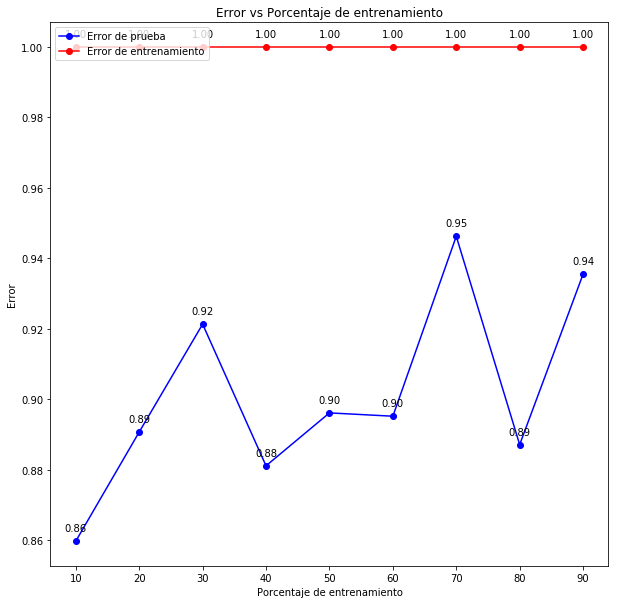

In [49]:
import matplotlib.pyplot as plt

train_percentage = []
error_test_values = []
error_train_values = []
for p in range(1,10):
  train_percentage.append((p*10))
  p_train = round((p * 0.1), 1)
  p_test = round((1 - p_train), 1)
  x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=p_train, test_size=p_test)
  print("Porcentaje de entrenamiento: {}%".format(p_train*100))
  d_tree = tree.DecisionTreeClassifier(max_depth=10)
  d_tree.fit(x_train, y_train)
  y_pred = d_tree.predict(x_test)
  # Error de prueba
  error_test = d_tree.score(x_test, y_test)
  print("\tError de prueba:", error_test)
  error_test_values.append(error_test)
  # Error de entrenamiento
  y_pred = d_tree.predict(x_train)
  error_train =  d_tree.score(x_train, y_train)
  print("\tError de entrenamiento:", error_train)
  error_train_values.append(error_train)

plt.figure(figsize=(10,10))
plt.plot(train_percentage, error_test_values, 'bo-', label="Error de prueba", color="blue")
plt.plot(train_percentage, error_train_values, 'bo-', label="Error de entrenamiento", color="red")
for d in train_percentage:
    y1 = error_test_values[int(d/10)-1]
    y2 = error_train_values[int(d/10)-1]
    plt.annotate("{:.2f}".format(y1), (d,y1), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate("{:.2f}".format(y2), (d,y2), textcoords="offset points", xytext=(0,10), ha='center')
plt.xticks(train_percentage)
plt.xlabel('Porcentaje de entrenamiento')
plt.ylabel('Error')
plt.title('Error vs Porcentaje de entrenamiento')
plt.legend(loc="upper left")
plt.show()

## Entrene un modelo de clasificación Naïve Bayes y evalúelo

Exactitud(Accuracy): 0.8387096774193549
Error de clasificación: 0.8387096774193549
Precisión(Precision): 0.9013157894736843
Índice de recuperación (Recall): 0.765625
	Error de prueba: 0.8387096774193549
	Error de entrenamiento: 0.8372093023255814
	Error de prueba: 0.8387096774193549
	Error de entrenamiento: 0.8372093023255814
	Error de prueba: 0.8387096774193549
	Error de entrenamiento: 0.827906976744186
	Error de prueba: 0.8387096774193549
	Error de entrenamiento: 0.827906976744186
	Error de prueba: 0.8387096774193549
	Error de entrenamiento: 0.827906976744186
	Error de prueba: 0.8387096774193549
	Error de entrenamiento: 0.827906976744186
	Error de prueba: 0.8387096774193549
	Error de entrenamiento: 0.827906976744186
	Error de prueba: 0.8387096774193549
	Error de entrenamiento: 0.827906976744186
	Error de prueba: 0.8387096774193549
	Error de entrenamiento: 0.827906976744186


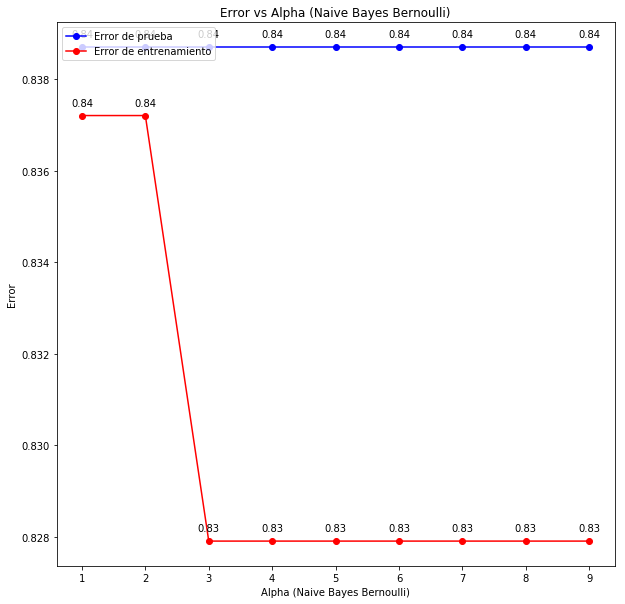

In [50]:
from sklearn.naive_bayes import BernoulliNB
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7, test_size=0.3)
nv_b = BernoulliNB()
nv_b.fit(x_train, y_train)
y_pred = nv_b.predict(x_test)
print("Exactitud(Accuracy):", metrics.accuracy_score(y_test, y_pred))
print("Error de clasificación:", nv_b.score(x_test, y_test))
print("Precisión(Precision):", metrics.precision_score(y_test, y_pred, average="macro"))
print("Índice de recuperación (Recall):", metrics.recall_score(y_test, y_pred, average="macro"))

alpha = []
error_test_values = []
error_train_values = []
for a in range(1,10):
  alpha.append(a)
  nv_b = BernoulliNB(alpha=a)
  nv_b.fit(x_train, y_train)
  y_pred = nv_b.predict(x_test)
  # Error de prueba
  error_test = nv_b.score(x_test, y_test)
  print("\tError de prueba:", error_test)
  error_test_values.append(error_test)
  # Error de entrenamiento
  y_pred = nv_b.predict(x_train)
  error_train =  nv_b.score(x_train, y_train)
  print("\tError de entrenamiento:", error_train)
  error_train_values.append(error_train)

plt.figure(figsize=(10,10))
plt.plot(alpha, error_test_values, 'bo-', label="Error de prueba", color="blue")
plt.plot(alpha, error_train_values, 'bo-', label="Error de entrenamiento", color="red")
for d in alpha:
    y1 = error_test_values[d-1]
    y2 = error_train_values[d-1]
    plt.annotate("{:.2f}".format(y1), (d,y1), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate("{:.2f}".format(y2), (d,y2), textcoords="offset points", xytext=(0,10), ha='center')
plt.xticks(alpha)
plt.xlabel('Alpha (Naive Bayes Bernoulli)')
plt.ylabel('Error')
plt.title('Error vs Alpha (Naive Bayes Bernoulli)')
plt.legend(loc="upper left")
plt.show()